#### CONSTRUCTION OF DRUG CLASS MAP

In [1]:
import pandas as pd

file_paths = {
    'all': 'UPDATED_DATA_OLD/all.csv',
    'approved': 'UPDATED_DATA_OLD/approved.csv',
    'biotech': 'UPDATED_DATA_OLD/biotech.csv',
    'experimental': 'UPDATED_DATA_OLD/experimental.csv',
    'illicit': 'UPDATED_DATA_OLD/illicit.csv',
    'investigational': 'UPDATED_DATA_OLD/investigational.csv',
    'nutraceutical': 'UPDATED_DATA_OLD/nutraceutical.csv',
    'small_molecule': 'UPDATED_DATA_OLD/small_molecule.csv',
    'withdrawn': 'UPDATED_DATA_OLD/withdrawn.csv'
}

target_data = {x: pd.read_csv(file_paths[x], index_col=0) for x in file_paths.keys()}

target_data['all'].head()

,Name,Gene Name,GenBank Protein ID,GenBank Gene ID,UniProt ID,Uniprot Title,PDB ID,GeneCard ID,GenAtlas ID,HGNC ID,Species,Drug IDs
ID,,,,,,,,,,,,
1,Peptidoglycan synthase FtsI,ftsI,1574687.0,L42023,P45059,FTSI_HAEIN,NaN,NaN,NaN,NaN,Haemophilus influenzae (strain ATCC 51907 / DS...,DB00303
2,Histidine decarboxylase,HDC,32109.0,X54297,P19113,DCHS_HUMAN,4E1O,NaN,HDC,HGNC:4855,Humans,DB00114; DB00117
3,"Glutaminase liver isoform, mitochondrial",GLS2,6650606.0,AF110330,Q9UI32,GLSL_HUMAN,4BQM,NaN,GLS2,HGNC:29570,Humans,DB00142
4,Coagulation factor XIII A chain,F13A1,182309.0,M22001,P00488,F13A_HUMAN,1EVU; 1EX0; 1F13; 1FIE; 1GGT; 1GGU; 1GGY; 1QRK...,NaN,F13A1,HGNC:3531,Humans,DB02340; DB11300; DB11311; DB11571; DB13151
5,"Nitric oxide synthase, inducible",NOS2,292242.0,L09210,P35228,NOS2_HUMAN,1NSI; 2LL6; 2NSI; 3E7G; 3EJ8; 3HR4; 4CX7; 4NOS,NaN,NOS2A,HGNC:7873,Humans,DB00125; DB00155; DB00244; DB01017; DB01110; D...


In [2]:
def get_drug_info(uniprot_id):
    drugs = {}
    for class_, data in target_data.items():
        drugs[class_] = []
        drug_lists = data[data["UniProt ID"] == uniprot_id]["Drug IDs"].values
        for dl in drug_lists:
            drugs[class_].extend([x.strip() for x in dl.split(";")])
    return drugs

In [3]:
get_drug_info("P05067")

{'all': ['DB00746',
  'DB01370',
  'DB01593',
  'DB02235',
  'DB02709',
  'DB03754',
  'DB04892',
  'DB05088',
  'DB05150',
  'DB05846',
  'DB05938',
  'DB06782',
  'DB09130',
  'DB09148',
  'DB09149',
  'DB09151',
  'DB12034',
  'DB12274',
  'DB14487',
  'DB14517',
  'DB14518',
  'DB14533',
  'DB14548',
  'DB14580'],
 'approved': ['DB00746',
  'DB01370',
  'DB01593',
  'DB03754',
  'DB06782',
  'DB09130',
  'DB09148',
  'DB09149',
  'DB09151',
  'DB12274',
  'DB14487',
  'DB14517',
  'DB14518',
  'DB14533',
  'DB14548',
  'DB14580'],
 'biotech': ['DB12034', 'DB12274', 'DB14580'],
 'experimental': ['DB02235', 'DB14548'],
 'illicit': [],
 'investigational': ['DB00746',
  'DB01370',
  'DB01593',
  'DB02709',
  'DB04892',
  'DB05088',
  'DB05150',
  'DB05846',
  'DB05938',
  'DB09130',
  'DB09149',
  'DB09151',
  'DB12034',
  'DB12274',
  'DB14487',
  'DB14517',
  'DB14518',
  'DB14533',
  'DB14580'],
 'nutraceutical': [],
 'small_molecule': ['DB00746',
  'DB01370',
  'DB01593',
  'DB0223

### Points to establish

1. Is it true that counts of number of drugs satisfy: all = biotech + nutraceutical + small_molecule?
No, there can be intersections, because a small molecule can be nutraceutical. So all <= B+N+SM is true. Also, each drug in the all set must belong to atleast one of B,N and SM.


In [4]:
drugs = get_drug_info("P05067")
for class_, drug_list in drugs.items():
    print(f"{class_}: {len(drug_list)}")

all: 24
approved: 16
biotech: 3
experimental: 2
illicit: 0
investigational: 19
nutraceutical: 0
small_molecule: 21
withdrawn: 0


In [5]:
import json 

with open("../protein_properties/protein_props.json") as f:
    protein_ids = list(json.load(f).keys())

print("Total proteins:", len(protein_ids))

Total proteins: 20434


In [6]:
drugs = get_drug_info("O15460")
drugs

{'all': ['DB00172'],
 'approved': [],
 'biotech': [],
 'experimental': [],
 'illicit': [],
 'investigational': [],
 'nutraceutical': ['DB00172'],
 'small_molecule': ['DB00172'],
 'withdrawn': []}

In [7]:
drug_class_map = {}
for pid in protein_ids:
    drugs = get_drug_info(pid)
    for class_, drug_list in drugs.items():
        for drug in drug_list:
            if drug not in drug_class_map:
                drug_class_map[drug] = {}
            if pid not in drug_class_map[drug]:
                drug_class_map[drug][pid] = set([class_])
            else:
                drug_class_map[drug][pid].update([class_])

Constructed drug class map as above. Note that the status of a drug the same across all of its targets. We have a total of 5954 drugs. DB12010 is the drug with largest number of targets = 303 human proteins

In [8]:
# verify that the drug status is same across all its targets
for drug, targets in drug_class_map.items():
    status = list()
    for target, classes in targets.items():
        if classes not in status:
            status.append(classes)
    if len(status) > 1:
        print(drug, status)

In [9]:
# Simplifying drug class mapping
drug_class_map_simple = {}
for pid in protein_ids:
    drugs = get_drug_info(pid)
    for class_, drug_list in drugs.items():
        for drug in drug_list:
            if drug not in drug_class_map_simple:
                drug_class_map_simple[drug] = set()
            drug_class_map_simple[drug].add(class_)

In [10]:
len(drug_class_map_simple)

5954

In [11]:
i = 0
for drug, classes in drug_class_map_simple.items():
    if i == 5: break 
    print(drug, classes)
    i += 1

DB00715 {'small_molecule', 'investigational', 'approved', 'all'}
DB01049 {'small_molecule', 'approved', 'all'}
DB01239 {'all', 'investigational', 'small_molecule', 'experimental', 'approved', 'withdrawn'}
DB09304 {'small_molecule', 'experimental', 'all'}
DB11273 {'small_molecule', 'approved', 'all'}


In [12]:
# number of drugs in approved and withdrawn or illicit
dicy_drugs = [x for x in drug_class_map_simple.keys() if "approved" in drug_class_map_simple[x] and ("withdrawn" in drug_class_map_simple[x] or "illicit" in drug_class_map_simple[x])]
len(dicy_drugs)

179

In [13]:
# save drug info in json
drug_class_map_simple = {k: list(v) for k, v in drug_class_map_simple.items()}
with open("DRUG_INFO/druginfo_updated.json", "w") as f:
    json.dump(drug_class_map_simple, f, indent=4)

#### PROTEIN DRUG MAP

In [13]:
all_proteins = set()
all_data = pd.read_csv("UPDATED_DATA_OLD/all.csv", index_col=0)
for pid in all_data["UniProt ID"]:
    if pid in protein_ids:
        all_proteins.add(pid)
len(all_proteins)

2927

In [14]:
protein_to_drug_map = {}
for pid in protein_ids:
    protein_to_drug_map[pid] = get_drug_info(pid)["all"]

len(protein_to_drug_map), protein_to_drug_map["P05067"], protein_to_drug_map["P45985"]

(20434,
 ['DB00746',
  'DB01370',
  'DB01593',
  'DB02235',
  'DB02709',
  'DB03754',
  'DB04892',
  'DB05088',
  'DB05150',
  'DB05846',
  'DB05938',
  'DB06782',
  'DB09130',
  'DB09148',
  'DB09149',
  'DB09151',
  'DB12034',
  'DB12274',
  'DB14487',
  'DB14517',
  'DB14518',
  'DB14533',
  'DB14548',
  'DB14580'],
 ['DB11718', 'DB14904'])

In [15]:
with open("DRUG_INFO/protein_drug_map.json", "w") as f:
    json.dump(protein_to_drug_map, f, indent=4)

#### CATEGORISATION

In [16]:
import json 

with open("DRUG_INFO/protein_drug_map.json") as f:
    protein_to_drug_map = json.load(f)

In [17]:
with open("DRUG_INFO/druginfo_updated.json") as f:
    drug_class_map_simple = json.load(f)

In [18]:
proteins_with_drugs = []
for protein, drugs in protein_to_drug_map.items():
    old_length = len(drugs)
    drugs = [x for x in drugs if ('illicit' not in drug_class_map_simple[x] and 'withdrawn' not in drug_class_map_simple[x])]
    if len(drugs) > 0:
        proteins_with_drugs.append(protein)
len(proteins_with_drugs)

2915

In [19]:
approved_proteins = []
for protein in proteins_with_drugs:
    drugs = [x for x in protein_to_drug_map[protein] if ('illicit' not in drug_class_map_simple[x] and 'withdrawn' not in drug_class_map_simple[x])]
    for drug in drugs:
        if "approved" in drug_class_map_simple[drug]:
            approved_proteins.append(protein)
            break
len(approved_proteins)

2233

In [20]:
with open("DRUG_INFO/druggable_proteins.txt", "w") as f:
    for protein in approved_proteins:
        f.write(protein + "\n")

investigational_proteins = [x for x in proteins_with_drugs if x not in approved_proteins]
print(len(investigational_proteins))

with open("DRUG_INFO/investigational_proteins.txt", "w") as f:
    for protein in investigational_proteins:
        f.write(protein + "\n")

682


In [25]:
small_molecule, biotech, nutraceutical = set(), set(), set()
for protein in investigational_proteins:
    drugs = [x for x in protein_to_drug_map[protein] if ('illicit' not in drug_class_map_simple[x] and 'withdrawn' not in drug_class_map_simple[x])]
    for drug in drugs:
        if "small_molecule" in drug_class_map_simple[drug]:
            small_molecule.add(protein)
        if "biotech" in drug_class_map_simple[drug]:
            biotech.add(protein)
        if "nutraceutical" in drug_class_map_simple[drug]:
            nutraceutical.add(protein)

print(len(small_molecule), len(biotech), len(nutraceutical))

728 53 71


In [23]:
!pip install matplotlib-venn

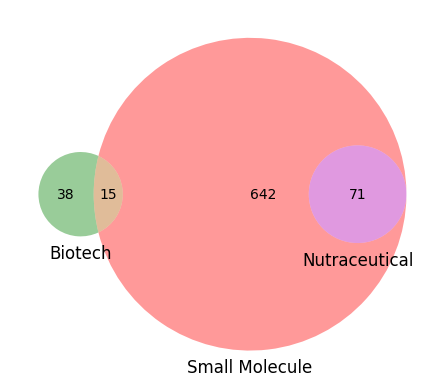

In [26]:
# draw a venn diagram of counts
import matplotlib.pyplot as plt
from matplotlib_venn import venn3

venn3([small_molecule, biotech, nutraceutical], ('Small Molecule', 'Biotech', 'Nutraceutical'))

# high definition images
plt.savefig("NEW_DRUG_INFO/investigational_venn.png", dpi=300)

#### EXTRA WORK

In [96]:
pharmacologically_active_data = pd.read_csv("data/pharmacologically_active.csv", index_col=0)
drug_pharmacological_map = {}
for row in pharmacologically_active_data.iterrows():
    if row[1]["UniProt ID"] not in protein_ids:
        continue
    drugs = [x.strip() for x in row[1]["Drug IDs"].split(";")]
    for drug in drugs:
        if drug not in drug_pharmacological_map:
            drug_pharmacological_map[drug] = set([row[1]["UniProt ID"]])
        else:
            drug_pharmacological_map[drug].add(row[1]["UniProt ID"])

In [98]:
len(drug_pharmacological_map)

1948

In [104]:
drug_pharmacological_map["DB11300"], set(drug_class_map["DB11300"].keys())

({'P00451',
  'P00488',
  'P02671',
  'P02675',
  'P02679',
  'P03951',
  'P05160',
  'P12259'},
 {'P00451',
  'P00488',
  'P02671',
  'P02675',
  'P02679',
  'P03951',
  'P05160',
  'P12259',
  'P25116',
  'Q96RI0'})